# GBA 6070 - Programming Foundation for Business Analytics
# Dr. Mohammad Salehan
# Final Exam
Enter your name below.

In this exam you will work with the weather dataset. Let's start with loading the dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather = pd.read_csv('weather2.csv')

We also use another dataset that contains information about each weather station.

In [2]:
stations = pd.read_excel('Station Information.xlsx')

1. Examine the shape of the both dataframes (1 points).

In [3]:
stations.shape

(29745, 10)

In [4]:
weather.shape

(100000, 14)

2. Check the top 5 rows of each dataframe to see what they look like (1 points).

In [5]:
stations.iloc[:5]

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323


In [6]:
weather.iloc[:5]

,Unnamed: 0,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


3. Drop the first column (Unnamed) from weather, then display the top row (1 points).

In [7]:
weather = weather.drop("Unnamed: 0", axis=1)
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0


In [8]:
weather.shape

(100000, 13)

4. Combine ``USAF`` and ``WBAN`` columns of ``stations`` ``DataFrame`` to create a new column named ``station_wban`` that looks like the one in ``weather`` ``DataFrame`` (``USAF_WBAN``) (1 points).

In [9]:
stations['station_wban'] = stations['USAF'].astype(str)+'-'+stations['WBAN'].astype(str)
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730,7018-99999
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822,7026-99999
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926,7070-99999
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920,8260-99999
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323,8268-99999


5. Join the 2 ``DataFrame``s to add ``station name``, country (``CTRY``) and state (``ST CALL``) to weather ``DataFrame``. There is no need for the rest of the columns in stations. You should use the proper type of join so that the number of rows in ``weather`` ``DataFrame`` stays the same. At the end of this part, the shape of ``weather`` should be (100000, 16). Check the first row of the result to make sure all values are correct  (1 points).

In [10]:
weather = pd.merge(weather, stations[["station_wban", "STATION NAME", "CTRY", "ST CALL"]], on='station_wban', how='left')
weather.shape

(100000, 16)

In [11]:
weather.iloc[:1]

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT


6. Show descriptive statistics for all numeric columns of ``weather`` ``DataFrame`` (1 points).

In [12]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,2009.34663,6.751760,15.871240,11.483780,136.975390,81.14740,5797.130830,23.626870,33.54303,-1839.430760,-4556.22822,-9511.991990
std,5.49655,3.392016,8.831961,6.926196,361.774103,362.78918,8303.764083,1264.655425,110.06946,3878.528361,4980.57331,2154.103991
min,1999.00000,1.000000,1.000000,0.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.00000,-9999.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,13.00000,10037.000000,70.000000,20.00000,0.000000,-9999.00000,-9999.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.00000,10140.000000,180.000000,31.00000,2.000000,-1.00000,-9999.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.00000,10189.000000,270.000000,46.00000,7.000000,0.00000,-9999.000000
max,2019.00000,12.000000,31.000000,23.000000,9999.000000,9999.00000,10449.000000,999.000000,999.00000,9.000000,2794.00000,1278.000000


7. In all numeric columns, values 9999, -9999, 999, and -999 represent missing values. Replace all of them with np.nan using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html' target='blank'>.replace() </a> method of ``DataFrame`` (1 points).

In [13]:
import numpy as np
weather.replace(to_replace= [9999, -9999, 999, -999], value= np.nan, inplace= True)
weather

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,NaN,300.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,NaN,310.0,57.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,NaN,320.0,62.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,NaN,300.0,72.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,9.0,29.0,20.0,306.0,239.0,10088.0,30.0,46.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99996,785350-11630,2011.0,9.0,29.0,21.0,289.0,233.0,10092.0,30.0,36.0,2.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99997,785350-11630,2011.0,9.0,29.0,22.0,272.0,239.0,10093.0,360.0,21.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99998,785350-11630,2011.0,9.0,29.0,23.0,256.0,228.0,10103.0,250.0,41.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR


8. Run descriptive statistics again to make sure the the values are transformed correctly (1 points).

In [14]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000
mean,2009.34663,6.751760,15.871240,11.483780,144.152882,87.462597,10162.052505,173.352971,34.144951,4.149736,1.315621,15.559120
std,5.49655,3.392016,8.831961,6.926196,110.650054,108.562320,71.561724,112.883343,23.637969,3.341461,18.754512,50.480649
min,1999.00000,1.000000,1.000000,0.000000,-289.000000,-333.000000,9833.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,14.000000,10121.000000,70.000000,20.000000,0.000000,0.000000,0.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.000000,10159.000000,180.000000,31.000000,4.000000,0.000000,0.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.000000,10204.000000,270.000000,46.000000,8.000000,0.000000,8.000000
max,2019.00000,12.000000,31.000000,23.000000,420.000000,280.000000,10449.000000,360.000000,175.000000,9.000000,2794.000000,1278.000000


9. All weather meaures are inflated with a factor of 10. For example, 289 for ``temperature`` means 28.9 degrees. Divide all measures by 10. Use ``.apply()`` method and a ``lambda function``. Other columns, such as day and hour should not be affected (1 points).

In [15]:
weather[["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 'precipitation_1h', 'precipitation_6h']] = weather[["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 'precipitation_1h', 'precipitation_6h']].apply(lambda x: x / 10)
weather

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,21.0,NaN,30.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,21.0,NaN,31.0,5.7,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,22.0,NaN,32.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,22.0,NaN,30.0,7.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,9.0,29.0,20.0,30.6,23.9,1008.8,3.0,4.6,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99996,785350-11630,2011.0,9.0,29.0,21.0,28.9,23.3,1009.2,3.0,3.6,2.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99997,785350-11630,2011.0,9.0,29.0,22.0,27.2,23.9,1009.3,36.0,2.1,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR
99998,785350-11630,2011.0,9.0,29.0,23.0,25.6,22.8,1010.3,25.0,4.1,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR


10. Calculate mean, max, and min values for each measure of weather for each month. In your output, replace month number with month names (15 points).

In [16]:
weather['month'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 11., 12.,  8.,  9., 10.])

In [17]:
mapping_ = dict(zip(weather['month'].unique(),['Jan','Feb','Mar','Apr','May','June','July','Nov','Dec','Aug','Sep','Oct']))
weather['month'] = weather['month'].apply(lambda x: mapping_[x])
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,NaN,30.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,NaN,31.0,5.7,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,NaN,32.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,NaN,30.0,7.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT


In [18]:
monthsummary = weather.groupby(['month']).aggregate({'temperature' : ['mean','max','min'], 
                                                     'dew_point' : ['mean','max','min'], 'pressure': ['mean','max','min'], 
                                                     'wind_direction': ['mean','max','min'], 'wind_speed': ['mean','max','min'], 'sky_condition':['mean','max','min'],
                                                     'precipitation_1h': ['mean','max','min'], 'precipitation_6h': ['mean','max','min']})
monthsummary

temperature              dew_point                 pressure          \
             mean   max   min       mean   max   min         mean     max   
month                                                                       
Apr     11.235925  41.0 -12.8   3.752994  26.0 -22.2  1015.871173  1041.5   
Aug     22.071835  42.0   0.0  16.550161  27.0  -2.8  1015.136875  1025.5   
Dec      5.306827  32.0 -21.1   0.301939  26.0 -25.0  1018.433968  1040.7   
Feb      8.038640  32.0 -28.9   2.755169  27.0 -32.2  1017.459004  1044.5   
Jan      6.927011  32.0 -28.3   3.043203  26.2 -33.3  1018.083328  1044.9   
July    21.941066  40.6   0.0  16.684922  27.0  -2.0  1016.134597  1031.1   
June    21.231470  42.0   5.0  14.314140  28.0  -5.0  1013.896069  1028.9   
Mar      8.890249  32.5 -18.9   2.228474  26.0 -26.7  1014.822810  1040.4   
May     16.960399  36.0  -1.1  10.094536  26.0  -9.4  1014.805513  1030.2   
Nov      9.947000  31.0 -11.1   4.296342  26.0 -22.3  1018.156550  1038.0   
Oct     13.234213  34.0  -7.8   8.055510  25.0 -12.0  1017.214911  1041.0   
Sep     20.016636  36.7  -2.2  14.520187  26.1 -10.0  1015.307790  1030.3   

             wind_direction  ... wind_speed sky_condition            \
         min           mean  ...        min          mean  max  min   
month                        ...                                      
Apr    993.7      18.142481  ...        0.0      4.214677  9.0  0.0   
Aug    998.3      16.349986  ...        0.0      3.493919  9.0  0.0   
Dec    983.3      17.443630  ...        0.0      4.753292  9.0  0.0   
Feb    989.8      18.876293  ...        0.0      4.477293  9.0  0.0   
Jan    983.7      18.803196  ...        0.0      4.151001  9.0  0.0   
July   998.8      16.456666  ...        0.0      3.733736  9.0  0.0   
June   996.8      17.904259  ...        0.0      4.619005  9.0  0.0   
Mar    990.1      18.646228  ...        0.0      3.977051  9.0  0.0   
May    992.4      17.593165  ...        0.0      4.949469  9.0  0.0   
Nov    987.9      16.784200  ...        0.0      4.298305  9.0  0.0   
Oct    986.7      15.812326  ...        0.0      4.004928  9.0  0.0   
Sep    994.0      16.580144  ...        0.0      3.598177  9.0  0.0   

      precipitation_1h             precipitation_6h              
                  mean    max  min             mean    max  min  
month                                                            
Apr           0.234354   17.3 -0.1         1.867419   27.9 -0.1  
Aug           0.121547   26.7 -0.1         2.625000   91.2 -0.1  
Dec           0.090005    9.1 -0.1         1.435068   27.4 -0.1  
Feb           0.149673    9.9 -0.1         0.954175   29.0 -0.1  
Jan           0.080480    9.9 -0.1         0.778727   22.1 -0.1  
July          0.100054   24.6 -0.1         1.301620   45.0 -0.1  
June          0.078360   18.0 -0.1         1.727011   35.8 -0.1  
Mar           0.136182  279.4 -0.1         0.954613   29.2 -0.1  
May           0.304338  269.0 -0.1         1.815000   36.1 -0.1  
Nov           0.104825   17.3 -0.1         1.490415   41.7 -0.1  
Oct           0.130604   30.2 -0.1         2.012754   69.9 -0.1  
Sep           0.143303   55.9 -0.1         3.101262  127.8 -0.1  

[12 rows x 24 columns]

11. Draw separate histograms for ``temperature``, ``dew point``, ``pressure``, and ``wind speed`` in one figure. Use subplots. Each plot should be labeled using corrosponding measure name. Explain how each distribution is (skewed right, skewed left, normal) (20 points).

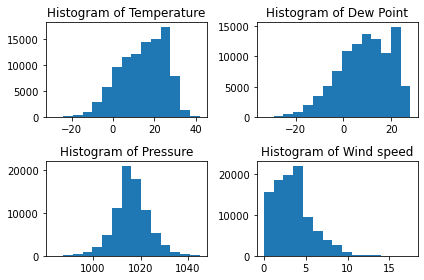

In [19]:
temperature = weather['temperature']
dew_point = weather['dew_point']
pressure = weather['pressure']
wind_speed = weather['wind_speed']

#Temperature
plt.subplot(2,2,1)
plt.hist(weather['temperature'], bins = 15)
plt.title('Histogram of Temperature')

#Dew point
plt.subplot(2,2,2)
plt.hist(weather['dew_point'], bins = 15)
plt.title('Histogram of Dew Point')

#Pressure
plt.subplot(2,2,3)
plt.hist(weather['pressure'], bins = 15)
plt.title('Histogram of Pressure')

#Wind speed
plt.subplot(2,2,4)
plt.hist(weather['wind_speed'], bins = 15)
plt.title('Histogram of Wind speed')

plt.tight_layout()

#Per outputs below, we can see that temperature and dew point are left-skewed, pressure is normal and wind speed 
#is right-skewed.

12. Draw a bar chart that shows average ``temperature`` for different months. Replace month number with month name and format month labels in a way that is readable by rotating them 30 degrees (20 points).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'Nov'),
  Text(8, 0, 'Dec'),
  Text(9, 0, 'Aug'),
  Text(10, 0, 'Sep'),
  Text(11, 0, 'Oct')])

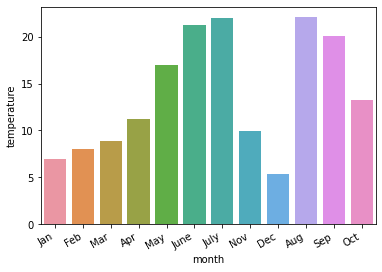

In [20]:
sns.barplot(data = weather, x = "month", y = "temperature", estimator=np.mean, ci=None);
plt.xticks(rotation = 30, horizontalalignment = 'right')

13. Plot a line chart that shows average ``temperature`` over time. The x-axis should contain a label for every other year (15 points).

In [21]:
#Average temperature by months
avg_temp_over_yr= weather.groupby(['year']).aggregate({'temperature' : ['mean']})
avg_temp_over_yr

,temperature
,mean
year,
1999.0,14.811743
2000.0,11.313909
2001.0,23.763014
2002.0,1.990567
2003.0,17.713370
2004.0,11.568137
2005.0,21.541719
2006.0,9.658583


Text(0.5, 1.0, 'Average Temperature over Time')

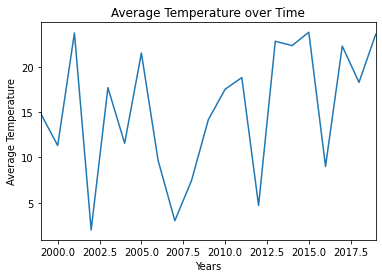

In [22]:
fig = plt.figure()
ax = plt.axes()

x = avg_temp_over_yr.index
ax.plot(x, avg_temp_over_yr)
ax.set_xlabel('Years')
ax.set_ylabel('Average Temperature')
ax.set_xlim(1999,2019)
ax.set_ylim()
ax.set_title('Average Temperature over Time')

14. Select the top 10 stations that have the most number of records. Draw a bar chat that shows the number of records for each of the 10 station (20 points).

In [23]:
weather['STATION NAME'].value_counts()[:10]

PITTSBURGH INTERNATIONAL AIRP    7994
ELOY ALFARO INTL                 7712
HECTOR INTERNATIONAL AIRPORT     6580
MCCHORD AFB AIRPORT              5872
BIRMINGHAM INTERNATIONAL AIRP    5848
PORTLAND INTERNATIONAL AIRPOR    4828
CATANIA/SIGONELLA                4315
OFFUTT AFB AIRPORT               4125
SPOKANE INTERNATIONAL AIRPORT    3722
GRISSOM AFB AIRPORT              3687
Name: STATION NAME, dtype: int64

Text(0, 0.5, 'Station Name')

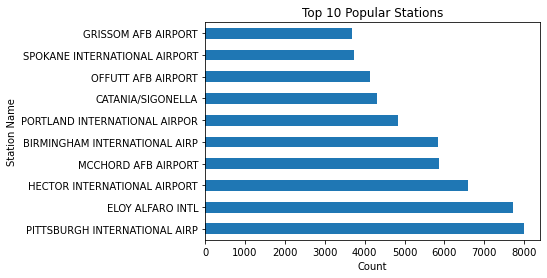

In [24]:
weather['STATION NAME'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Popular Stations')
plt.xlabel('Count')
plt.ylabel('Station Name')

15. Add a new column named ``season`` which is calculated based on month. Use Jun-Aug for summer, Dec-Feb for winter and so on (15 points).

In [25]:
weather['season'] = weather['month']
weather['season'] = weather['season'].replace(['Mar','Apr','May'],'Spring')
weather['season'] = weather['season'].replace(['June','July','Aug'],'Summer')
weather['season'] = weather['season'].replace(['Sep','Oct','Nov'],'Fall')
weather['season'] = weather['season'].replace(['Dec','Jan','Feb'],'Winter')
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL,season
0,841170-99999,2010.0,Jan,15.0,16.0,27.0,21.0,NaN,30.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
1,841170-99999,2010.0,Jan,15.0,17.0,27.0,21.0,NaN,31.0,5.7,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
2,841170-99999,2010.0,Jan,15.0,18.0,27.6,20.8,1011.5,31.0,5.1,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
3,841170-99999,2010.0,Jan,15.0,19.0,28.0,22.0,NaN,32.0,6.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter
4,841170-99999,2010.0,Jan,15.0,20.0,28.0,22.0,NaN,30.0,7.2,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,Winter


In [26]:
count__ = weather.groupby(['season']).aggregate({'season' : ['count']})
count__

,season
,count
season,
Fall,26701
Spring,19321
Summer,29858
Winter,24120


16. For the top 10 stations calculated in previous steps, draw a bar chart that shows average ``temperature`` for each season for each station (15 points).

In [27]:
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [28]:
df = weather.groupby(["STATION NAME"])
df1 = df.apply(lambda x: x.sort_values(["season"]))
df2 = df1.reset_index(drop=True)
df3 = df2.apply(lambda row: row[df2['STATION NAME'].isin(['PITTSBURGH INTERNATIONAL AIRP','ELOY ALFARO INTL','HECTOR INTERNATIONAL AIRPORT','MCCHORD AFB AIRPORT',
         'BIRMINGHAM INTERNATIONAL AIRP','PORTLAND INTERNATIONAL AIRPOR','CATANIA/SIGONELLA','OFFUTT AFB AIRPORT',
         'SPOKANE INTERNATIONAL AIRPORT','GRISSOM AFB AIRPORT'])])
df4 = df3.groupby(by = ['STATION NAME','season']).aggregate({'temperature' : ['mean']})
df4

temperature
                                            mean
STATION NAME                  season            
BIRMINGHAM INTERNATIONAL AIRP Fall     17.347262
                              Spring   12.081137
                              Summer   29.415005
                              Winter    8.348600
CATANIA/SIGONELLA             Fall     17.949288
                              Summer   26.276067
                              Winter   12.087746
ELOY ALFARO INTL              Fall     24.933565
                              Spring   26.669272
                              Summer   24.555012
                              Winter   26.757168
GRISSOM AFB AIRPORT           Spring   11.425219
                              Summer   21.947500
                              Winter   -1.715503
HECTOR INTERNATIONAL AIRPORT  Fall      9.236267
                              Spring    8.918556
                              Summer   21.332843
MCCHORD AFB AIRPORT           Spring    8.686896
                              Summer   18.417349
                              Winter    4.060111
OFFUTT AFB AIRPORT            Fall     18.050525
                              Spring   18.500000
                              Summer   23.353663
PITTSBURGH INTERNATIONAL AIRP Fall      7.078746
                              Spring   11.691259
                              Summer   12.440785
                              Winter    1.990972
PORTLAND INTERNATIONAL AIRPOR Fall     13.889208
                              Spring   12.894737
                              Summer   19.270299
SPOKANE INTERNATIONAL AIRPORT Fall      9.413165
                              Summer   22.529486
                              Winter   -0.236743

Text(0.5, 0, 'Station Name')

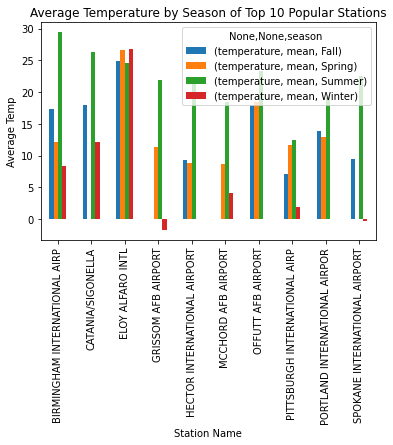

In [29]:
df4.groupby(['STATION NAME','season']).mean().unstack(fill_value=0).plot.bar()
plt.title('Average Temperature by Season of Top 10 Popular Stations')
plt.ylabel('Average Temp')
plt.xlabel('Station Name')

17. Draw a pair plot of all weather measures. Put season on color (10 points).

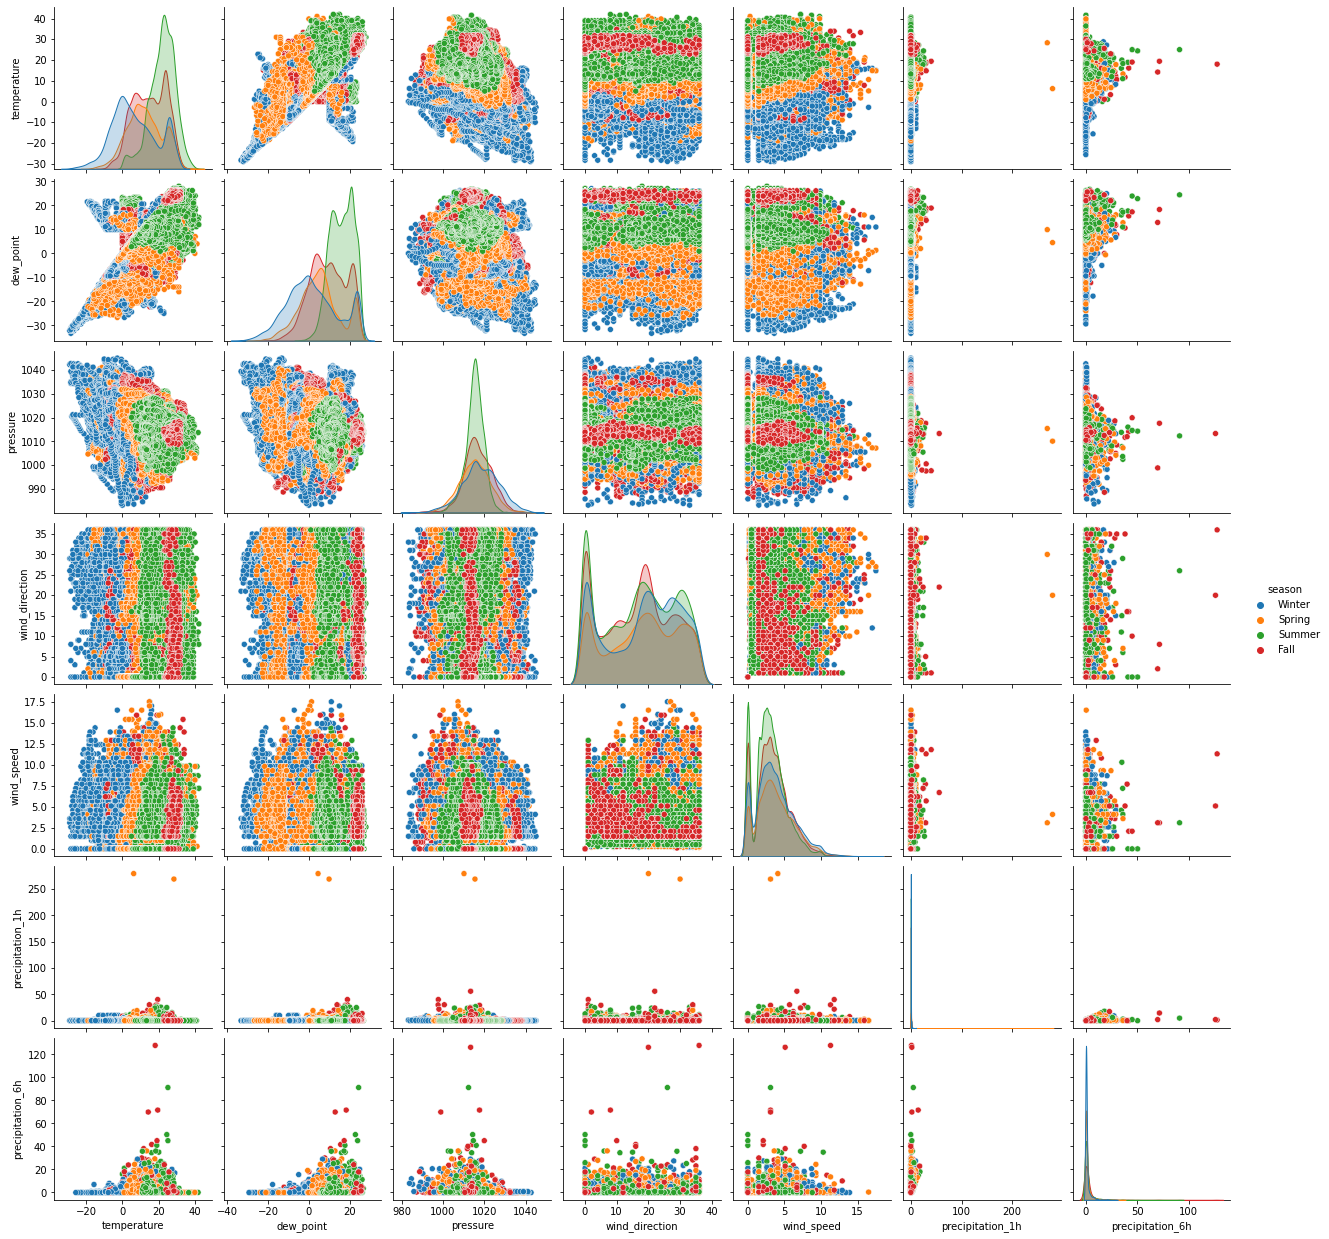

In [30]:
sns.pairplot(weather, vars = ["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 
                              'precipitation_1h', 'precipitation_6h'], x_vars = ["temperature", 'dew_point', 'pressure', 
                                                                                 'wind_direction', 'wind_speed', 
                                                                                 'precipitation_1h', 'precipitation_6h'], 
             y_vars =["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 'precipitation_1h', 
                      'precipitation_6h'], hue ='season')

18. Based on what you see above, which columns contain outliers? (10 points)

19. Exclude all outliers and store the result in a new ``DataFrame`` named ``weather_no_outlier``. Make sure you don't end up with too few records by excluding missing values. Check the shape of your ``DataFrame`` after filtering to make sure you retained most of your data (15 points).

In [31]:
# Create the dataframe
columns_ = ['precipitation_1h','precipitation_6h']

#Drop NA values in 2 columns above
weather_no_outlier = weather[columns_].dropna()

#Remove outliers using IQR
Q1 = weather[columns_].dropna().quantile(0.25)
Q3 = weather[columns_].dropna().quantile(0.75)
IQR = Q3 - Q1
weather_no_outlier= weather[~((weather[columns_].dropna() < (Q1 - 1.5 * IQR)) |(weather[columns_] > (Q3 + 1.5 * IQR))).all(axis=1)]
print('weather shape: ', weather.shape)
print('weather_no_outlier shape: ', weather_no_outlier.shape)

weather shape:  (100000, 17)
weather_no_outlier shape:  (99845, 17)


20. Rerun the pair plot to see how it changed after outlier removal (1 points).

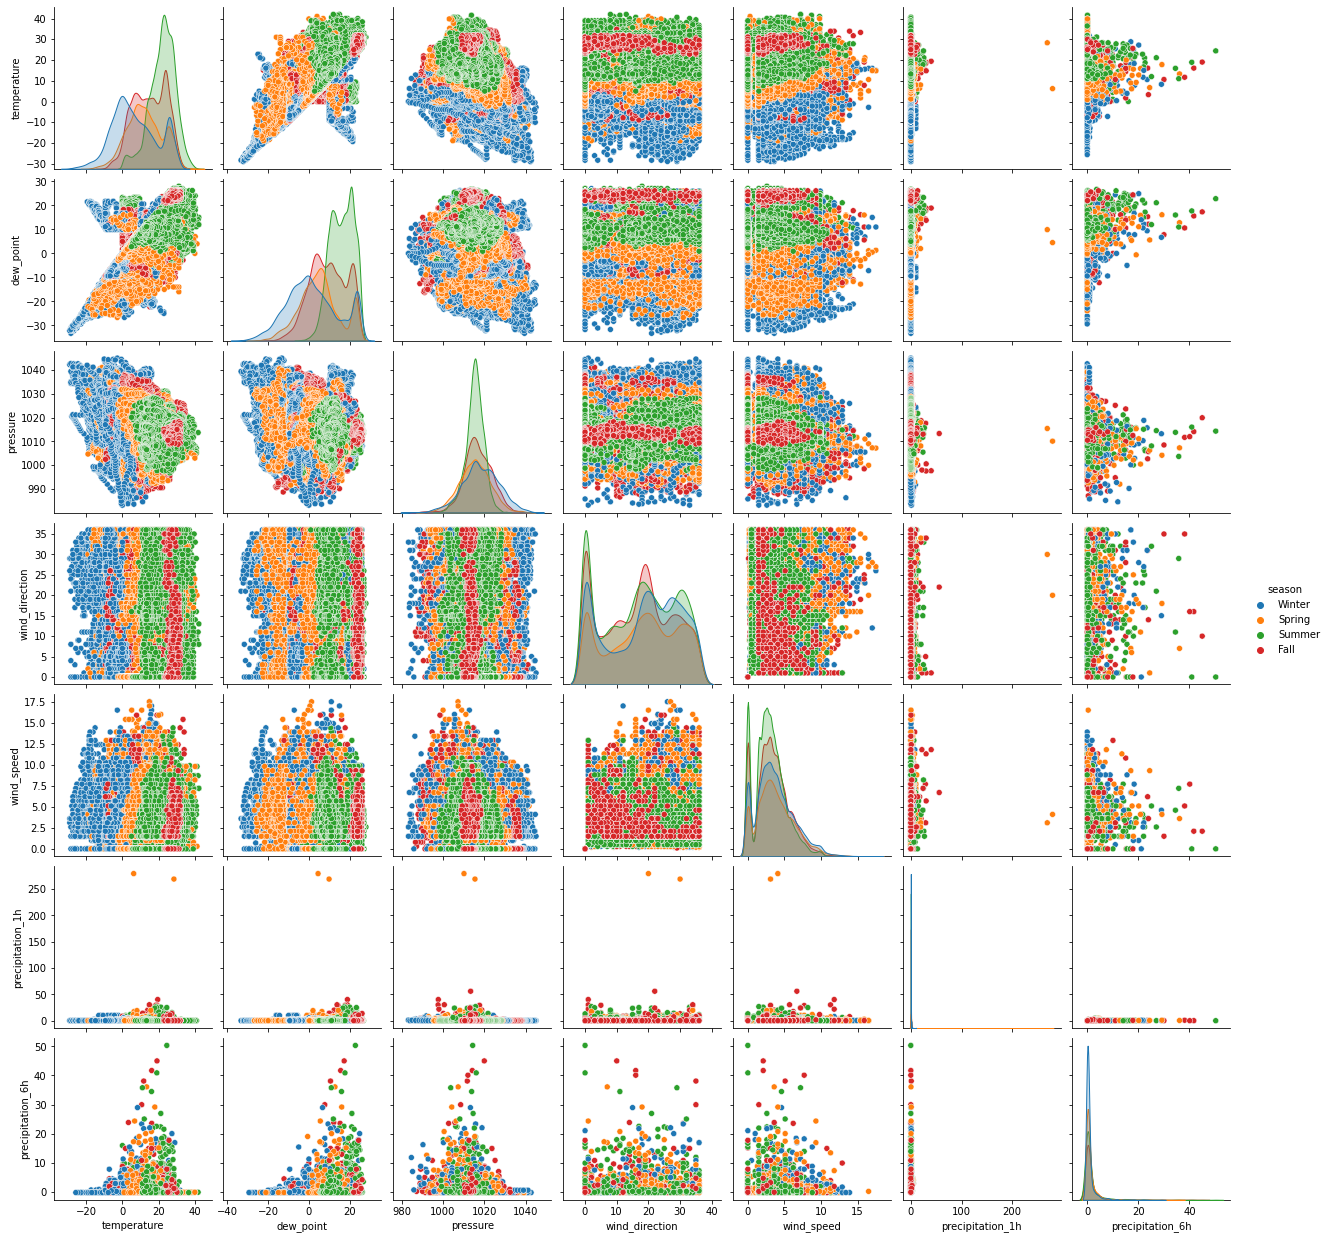

In [32]:
sns.pairplot(weather_no_outlier, vars = ["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 
                              'precipitation_1h', 'precipitation_6h'], x_vars = ["temperature", 'dew_point', 'pressure', 
                                                                                 'wind_direction', 'wind_speed', 
                                                                                 'precipitation_1h', 'precipitation_6h'], 
             y_vars =["temperature", 'dew_point', 'pressure', 'wind_direction', 'wind_speed', 'precipitation_1h', 
                      'precipitation_6h'], hue ='season')

21. Do any two of these measures seem to be related? (10 points)

22. Below write anything the catches your eye in the charts above (10 points).

23. Replace all missing values with the value from the previous record (15 points).

In [33]:
weather.isna().sum()

station_wban            0
year                    0
month                   0
day                     0
hour                    0
temperature           289
dew_point             302
pressure            21683
wind_direction       2499
wind_speed             63
sky_condition       18430
precipitation_1h    45574
precipitation_6h    95137
STATION NAME            0
CTRY                    0
ST CALL                 0
season                  0
dtype: int64

In [34]:
weather = weather.fillna(method="ffill")

24. Replace the remaining missing values with the value from the next record (15 points).

In [35]:
weather = weather.fillna(method="bfill")

25. Are there any missing values left? If yes, replace them with the mean of the station (10 points).

In [36]:
weather.isna().sum() #There is no more missing values left.

station_wban        0
year                0
month               0
day                 0
hour                0
temperature         0
dew_point           0
pressure            0
wind_direction      0
wind_speed          0
sky_condition       0
precipitation_1h    0
precipitation_6h    0
STATION NAME        0
CTRY                0
ST CALL             0
season              0
dtype: int64

26. Create a new ``DataFrame`` named ``normalized_df`` that contains normalized values of all measures of ``weather`` ``DataFrame``. ``normalized_df`` must contain the same columns as ``weather`` but all weather measures are normalized (10 points).

In [37]:
from sklearn import preprocessing
normalized_df = weather.copy()
normalized_df.iloc[:, 5:13] = preprocessing.scale(normalized_df.iloc[:, 5:13])
normalized_df.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL,season
0,841170-99999,2010.0,Jan,15.0,16.0,1.135017,1.126024,-0.593457,1.123373,0.713112,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,Winter
1,841170-99999,2010.0,Jan,15.0,17.0,1.135017,1.126024,-0.593457,1.211688,0.966931,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,Winter
2,841170-99999,2010.0,Jan,15.0,18.0,1.189144,1.107634,-0.593457,1.211688,0.713112,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,Winter
3,841170-99999,2010.0,Jan,15.0,19.0,1.225228,1.217975,-0.593457,1.300004,1.178447,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,Winter
4,841170-99999,2010.0,Jan,15.0,20.0,1.225228,1.217975,-0.593457,1.123373,1.601478,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,Winter


27. In ``normalized_df``, convert all categorical varaibles, except for ``station_wban``, to dummies (10 points).

In [38]:
normalized_df = pd.get_dummies(normalized_df, columns=['month', 'STATION NAME', 'CTRY', 'ST CALL', 'season'])

28. Check the head of ``normalized_df`` (5 points).

In [39]:
normalized_df.head()

,station_wban,year,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,...,ST CALL_VA KRIC,ST CALL_VT KBTV,ST CALL_WA KGEG,ST CALL_WA KTCM,ST CALL_WSAP,ST CALL_WSSS,season_Fall,season_Spring,season_Summer,season_Winter
0,841170-99999,2010.0,15.0,16.0,1.135017,1.126024,-0.593457,1.123373,0.713112,0.881941,...,0,0,0,0,0,0,0,0,0,1
1,841170-99999,2010.0,15.0,17.0,1.135017,1.126024,-0.593457,1.211688,0.966931,0.881941,...,0,0,0,0,0,0,0,0,0,1
2,841170-99999,2010.0,15.0,18.0,1.189144,1.107634,-0.593457,1.211688,0.713112,0.881941,...,0,0,0,0,0,0,0,0,0,1
3,841170-99999,2010.0,15.0,19.0,1.225228,1.217975,-0.593457,1.300004,1.178447,0.881941,...,0,0,0,0,0,0,0,0,0,1
4,841170-99999,2010.0,15.0,20.0,1.225228,1.217975,-0.593457,1.123373,1.601478,0.881941,...,0,0,0,0,0,0,0,0,0,1
